# <b>EasySQ Squidpy Interface Tutorial</b>

## This is a short tutorial on how to use EasySQ in tandem with Squidpy when your analysis requires a deeper dive into Squidpy than the abstraction that EasySQ provides.

### What does this tutorial cover?

EasySQ strives to simplify the process of using Squidpy, however, there are instances where we don't want abstraction and need to dive into the deeper Squidpy and Scanpy functions. This is tutorial covers how to work with those underlying functions while maintaining the functionality provided by EasySQ. 

#### For more information regarding any of the functions used below, see the corresponding [Squidpy documentation](https://squidpy.readthedocs.io/en/stable/api.html#).

### Concepts

<ol>
    <li>Necessary libraries to use Squidpy and Scanpy in tandem.</li>
    <li>Getting and using adata as an argument instead of a class variable.</li>
</ol>

### Importing Squidpy and Scanpy

These are the libraries that are used by EasySQ in the underlying functions. If they aren't installed, we install scanpy, squidpy, and scikit-misc (dependency) first. Then, we import scanpy and squidpy for later use.

We ignore the warnings in this notebook for readability, but you should enable them in your project.

In [1]:
# !pip install scanpy
# !pip install squidpy
# !pip install scikit-misc

import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import squidpy as sq
import EasySQ as esq

# other needed libraries
import time
import os

### Importing Data

We are going to use the same data from demo 1 for this tutorial, as that is easiest.

In [2]:
if __name__ == "__main__":
    t0 = time.time()  # time the execution of the program

    path = os.getcwd() + '/tutorial_data_1/'
    esqAn = esq.Analysis(data_path=path)
    esqAn.print()
    


OBJECT INFO
object: <EasySQ.Analysis object at 0x000001B9E904AC80>
object ID: UA4B39pV9

DATA
 data path: C:\Users\scrouse2\Crouse_Work_Files\Documentation\EasySQ/tutorial_data_1/
 adata:
 AnnData object with n_obs × n_vars = 78329 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'



### Using Squidpy to plot instead of EasySQ: Basic example of interfacing.

This example shows how to use Squidpy to plot instead of EasySQ to demonstrate how to get the data from our Analysis object for use in Squidpy. The available graphs show that "Slc17a7" and "Oxgr1" are available genes to plot. Lets plot the genes' expressions.

Take special note that the <code>shape</code> argument is set to none in the <code>sq.pl.spatial_scatter(shape=None)</code> line. Unless this is set, Squidpy will throw an error.<br>
EasySQ also renames the <code>color</code> parameter to <code>graphs</code>. This more accurately represents the point of this argument.

AVAILABLE GRAPHS:
 Pass any of these to spatialScatter() to plot!
 Genes: ['Oxgr1', 'Htr1a', 'Htr1b', 'Htr1d', 'Htr1f', 'Htr2a', 'Htr2b', 'Htr2c', 'Htr4', 'Htr5a', 'Htr5b', 'Htr6', 'Htr7', 'Adora1', 'Adora2a', 'Adora2b', 'Adora3', 'Adgra1', 'Adgra2', 'Adgra3', 'Adgrb1', 'Adgrb3', 'Adgre1', 'Adgre4', 'Adgrf4', 'Adgrf5', 'Adgrl1', 'Adgrl2', 'Adgrl3', 'Adgrl4', 'Adgrd1', 'Adgrf1', 'Adgrf2', 'ADGRF3', 'Adgrg1', 'Adgrg2', 'Adgrg4', 'Adgrg5', 'Adgrg6', 'Adgrg7', 'Adgrv1', 'Mc2r', 'Adra1a', 'Adra1b', 'Adra1d', 'Adra2a', 'Adra2b', 'Adra2c', 'Aplnr', 'Ackr1', 'Ackr2', 'Ackr3', 'Ackr4', 'Bdkrb1', 'Bdkrb2', 'Adrb1', 'Adrb2', 'Adrb3', 'Brs3', 'Ccr1l1', 'Ccr1', 'Ccr10', 'Ccr2', 'Ccr4', 'Ccr6', 'Ccr7', 'Ccr8', 'Ccr9', 'Ccrl2', 'Cxcr1', 'Cxcr2', 'Cxcr3', 'Cxcr4', 'Cxcr5', 'Cxcr6', 'C3ar1', 'C5ar1', 'C5ar2', 'Celsr1', 'Celsr2', 'Celsr3', 'Calcrl', 'Calcr', 'Cnr1', 'Cnr2', 'Xcr1', 'Cmklr1', 'Cckar', 'Crhr1', 'Crhr2', 'Cx3cr1', 'Cysltr1', 'Cysltr2', 'Drd1', 'Drd5', 'Drd2', 'Drd3', 'Drd4', 'Oprd1', 'Ednr

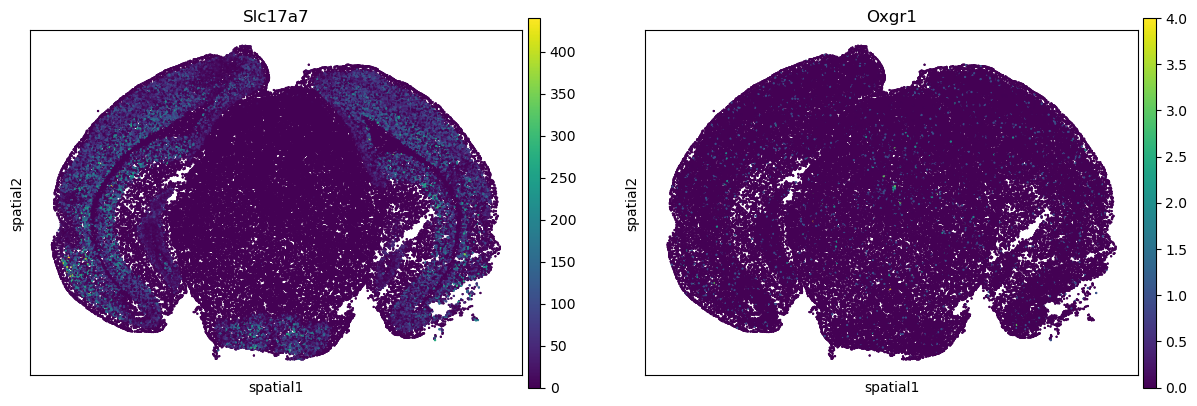

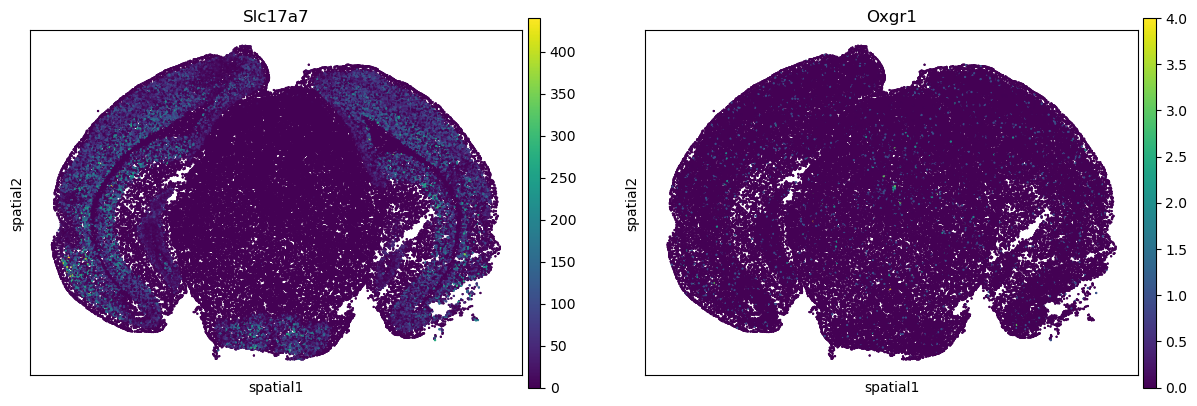

In [3]:
    esqAn.availableGraphs();
    
    esqAn.spatialScatter(graphs=["Slc17a7", "Oxgr1"])
    sq.pl.spatial_scatter(esqAn.getAdata(), color=["Slc17a7", "Oxgr1"], shape=None)

As you can see, these behave the same. Let's go on to a slightly more complex example.

### Subsample and co-occurence probability calculation.

In this example we will use the adata stored in EasySQ to run the Squidpy subsample and co-occurence operations.<br>
First we will list the way to do it in EasySQ as a comment, then we will show how to combine the two.<br>

First we get the adata from our EasySQ object and pass it into the Scanpy leiden and subsample functions. We then use this subsample in the Squidpy functions.<br>
EasySQ saves time here because much of the parameter micro-management is built into the functions already. For example, the co-occurence functions default to "leiden" as the <code>cluster_key</code>.<br>

In summary, if you want to use EasySQ and Squidpy/Scanpy together, you may use <code>esqAn.getAdata()</code> to retrieve the adata from the class object. This can then be fed into other Squidpy and Scanpy functions for additional operations. Furthermore, this also lets you take advantage of the EasySQ ease of use functionality such as palettes and code simplification.

         Falling back to preprocessing with `sc.pp.pca` and default params.


  0%|          | 0/210 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'leiden_colors'. Using `None`.


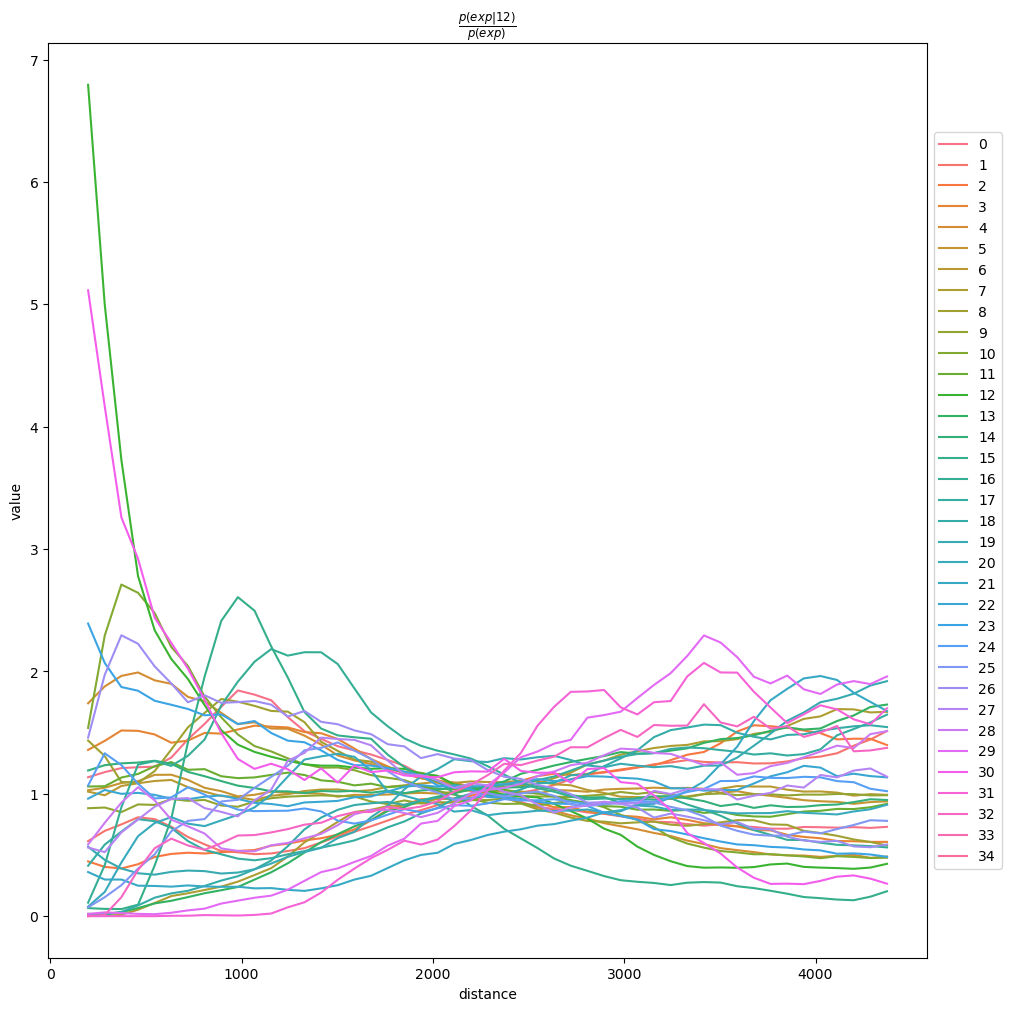

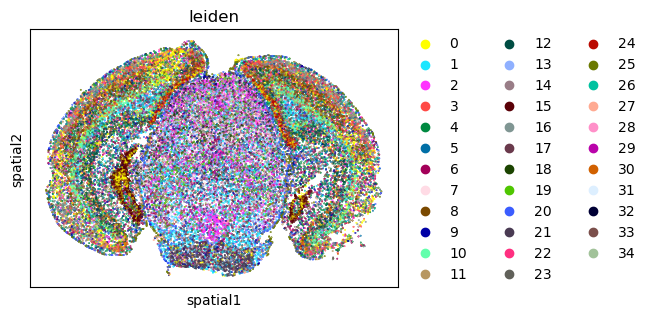

In [4]:
    """
    esqAn.pp_neighbors()
    esqAn.leiden()
    adata_subsample = esqAn.adataSubsample(fraction=0.5, copy=True)  # get the subsample
    esqAn.gr_co_occurrence(adata=adata_subsample)  # do the co-occurence calculation
    esqAn.pl_co_occurrence(adata=adata_subsample)  # plot the co-occurence calculation

    esqAn.spatialScatter(adata=adata_subsample, graphs=["leiden"], size=0.5)  # plot the subsample leiden clusters
    # """
    
    sc.pp.neighbors(esqAn.getAdata())
    sc.tl.leiden(esqAn.getAdata())
    
    adata_subsample = sc.pp.subsample(esqAn.getAdata(), fraction=0.5, copy=True)

    sq.gr.co_occurrence(adata_subsample, cluster_key="leiden")
    sq.pl.co_occurrence(adata_subsample, cluster_key="leiden", clusters="12", figsize=(10, 10))
    sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=0.25)
    esqAn.showPlots()